In [11]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

ds = pd.read_csv('HeartRate.csv')
print(ds)

                     datetime  bpm   period
0     2018-05-03 06:14:29.968   93  morning
1     2018-05-03 06:14:30.967   93  morning
2     2018-05-03 06:14:30.969   90  morning
3     2018-05-03 06:14:30.970   90  morning
4     2018-05-03 06:14:31.471   93  morning
5     2018-05-03 06:14:31.770   93  morning
6     2018-05-03 06:14:32.073   95  morning
7     2018-05-03 06:14:32.372   99  morning
8     2018-05-03 06:14:32.671   99  morning
9     2018-05-03 06:14:46.790   91  morning
10    2018-05-03 06:14:47.089   91  morning
11    2018-05-03 06:14:47.691   91  morning
12    2018-05-03 06:14:47.990   80  morning
13    2018-05-03 06:14:48.293   80  morning
14    2018-05-03 06:14:48.592   80  morning
15    2018-05-03 06:14:48.891    8  morning
16    2018-05-03 06:14:49.194   80  morning
17    2018-05-03 06:14:49.494   80  morning
18    2018-05-03 06:14:49.797   80  morning
19    2018-05-03 06:14:50.096   80  morning
20    2018-05-03 06:14:50.395   80  morning
21    2018-05-03 06:14:50.698   

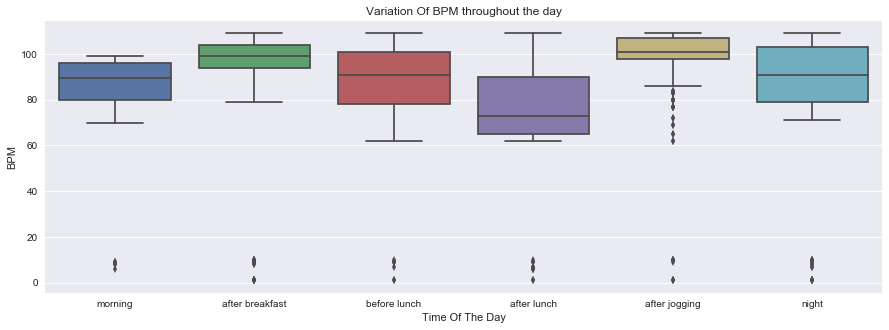




We see that the median heart beat rates are:
Morning:          89.5
After Breakfast:  99.0
Before Lunch:     91.0
After Lunch:      73.0
After jogging:    101.0
Night:            91.0

NOTE:
Median is chosen as the measure of central tendency
as mean can give misleading values in the presence of outliers


In [40]:
#Box plot is the best for understanding and getting the first idea about the data.

plt.figure(figsize = (15,5))
sns.boxplot(data=ds, x="period", y="bpm")
plt.xlabel("Time Of The Day")
plt.ylabel("BPM")
plt.title("Variation Of BPM throughout the day")
plt.show()

print("\n\n")
print("We see that the median heart beat rates are:")

x = ds[ds['period']=='morning']
print("Morning:         ",np.median(x.bpm))

x = ds[ds['period']=='after breakfast']
print("After Breakfast: ",np.median(x.bpm))

x = ds[ds['period']=='before lunch']
print("Before Lunch:    ",np.median(x.bpm))

x = ds[ds['period']=='after lunch']
print("After Lunch:     ",np.median(x.bpm))

x = ds[ds['period']=='after jogging']
print("After jogging:   ",np.median(x.bpm))

x = ds[ds['period']=='night']
print("Night:           ",np.median(x.bpm))

print("\nNOTE:\nMedian is chosen as the measure of central tendency\
\nas mean can give misleading values in the presence of outliers")

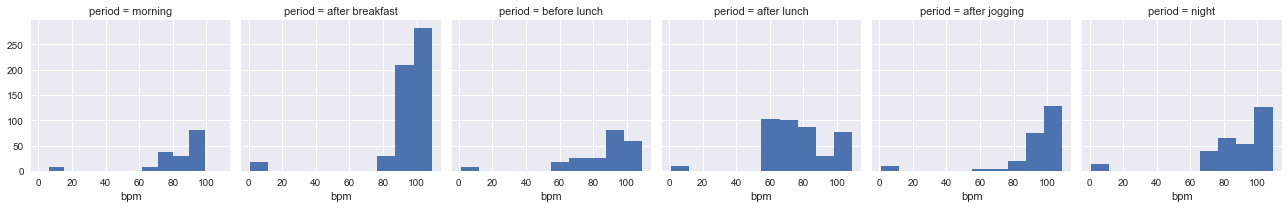

The above plots along with the boxplot help us see the distribution of the outliers.
The outliers in the dataset are existant mainly due to sligth equipment imperfections
and mis-alignment of sensor during general body movement.

NOTE:
The various heights of the histograms indicate to us that measurments taken are not
equal in number for all the different periods of the day.



In [45]:
#Just to see distribution.

print()

grid = sns.FacetGrid(ds, col='period')
grid.map(plt.hist, 'bpm')
plt.show()


print("The above plots along with the boxplot help us see the distribution of the outliers.")
print("The outliers in the dataset are existant mainly due to sligth equipment imperfections\
\nand mis-alignment of sensor during general body movement.")

print("\nNOTE:")
print("The various heights of the histograms indicate to us that measurments taken are not\
\nequal in number for all the different periods of the day.")
print()

                     datetime  bpm   period
0     2018-05-03 06:14:29.968   93  morning
1     2018-05-03 06:14:30.967   93  morning
2     2018-05-03 06:14:30.969   90  morning
3     2018-05-03 06:14:30.970   90  morning
4     2018-05-03 06:14:31.471   93  morning
5     2018-05-03 06:14:31.770   93  morning
6     2018-05-03 06:14:32.073   95  morning
7     2018-05-03 06:14:32.372   99  morning
8     2018-05-03 06:14:32.671   99  morning
9     2018-05-03 06:14:46.790   91  morning
10    2018-05-03 06:14:47.089   91  morning
11    2018-05-03 06:14:47.691   91  morning
12    2018-05-03 06:14:47.990   80  morning
13    2018-05-03 06:14:48.293   80  morning
14    2018-05-03 06:14:48.592   80  morning
16    2018-05-03 06:14:49.194   80  morning
17    2018-05-03 06:14:49.494   80  morning
18    2018-05-03 06:14:49.797   80  morning
19    2018-05-03 06:14:50.096   80  morning
20    2018-05-03 06:14:50.395   80  morning
21    2018-05-03 06:14:50.698   80  morning
22    2018-05-03 06:14:50.997   

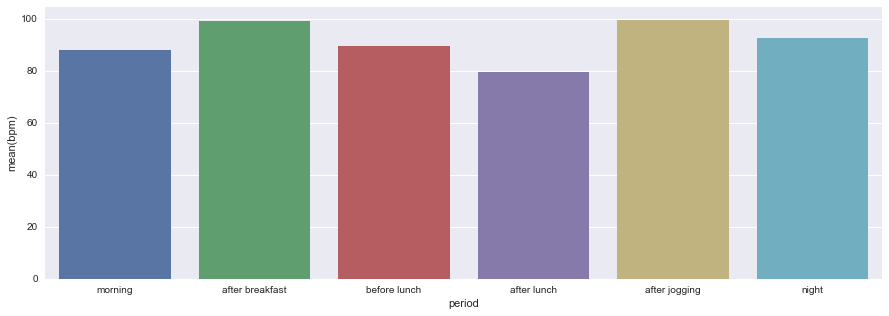

This is a good way to visualize the data after removing the outliers present.
Here we take mean into account as there arent any outliers to affect its accuracy.


In [50]:
#Visulizing Mean of cleaned dataset.

cleaned = ds[ds['bpm'] > 20]
print(cleaned)
print("Number of rows:     ", len(cleaned))
print("Number of outliers: ", len(ds) - len(cleaned))

plt.figure(figsize = (15,5))
sns.barplot(data = cleaned, x='period', y='bpm', ci = 0)
plt.show()

print("This is a good way to visualize the data after removing the outliers present.")
print("Here we take mean into account as there arent any outliers to affect its accuracy.")

In [57]:
#Just a comparsion between median of uncleaned data and mean of cleaned.

print("Understanding the impact of choosing wrong central tendency:\n")

#Morning
print("Morning.")
print("Uncleaned:")
x = ds[ds['period']=='morning']
print("Median of measurements  :           ",np.median(x.bpm))
print("Mean of measurements    :           ",np.mean(x.bpm))

print("cleaned")
y = cleaned[cleaned['period']=='morning']
print("Median of measurements  :           ",np.median(y.bpm))
print("Mean of measurements    :           ",np.mean(y.bpm))
print()


#After Breakfast
print("After Breakfast.")
print("Uncleaned:")
x = ds[ds['period']=='after breakfast']
print("Median of measurements  :           ",np.median(x.bpm))
print("Mean of measurements    :           ",np.mean(x.bpm))

print("cleaned")
y = cleaned[cleaned['period']=='after breakfast']
print("Median of measurements  :           ",np.median(y.bpm))
print("Mean of measurements    :           ",np.mean(y.bpm))
print()


#Before Lunch
print("Before Lunch.")
print("Uncleaned:")
x = ds[ds['period']=='before lunch']
print("Median of measurements  :           ",np.median(x.bpm))
print("Mean of measurements    :           ",np.mean(x.bpm))

print("cleaned")
y = cleaned[cleaned['period']=='before lunch']
print("Median of measurements  :           ",np.median(y.bpm))
print("Mean of measurements    :           ",np.mean(y.bpm))
print()


#After Lunch
print("After Lunch.")
print("Uncleaned:")
x = ds[ds['period']=='after lunch']
print("Median of measurements  :           ",np.median(x.bpm))
print("Mean of measurements    :           ",np.mean(x.bpm))

print("cleaned")
y = cleaned[cleaned['period']=='after lunch']
print("Median of measurements  :           ",np.median(y.bpm))
print("Mean of measurements    :           ",np.mean(y.bpm))
print()


#After Jogging
print("After Jogging.")
print("Uncleaned:")
x = ds[ds['period']=='after jogging']
print("Median of measurements  :           ",np.median(x.bpm))
print("Mean of measurements    :           ",np.mean(x.bpm))

print("cleaned")
y = cleaned[cleaned['period']=='after jogging']
print("Median of measurements  :           ",np.median(y.bpm))
print("Mean of measurements    :           ",np.mean(y.bpm))
print()


#Night
print("Night.")
print("Uncleaned:")
x = ds[ds['period']=='night']
print("Median of measurements  :           ",np.median(x.bpm))
print("Mean of measurements    :           ",np.mean(x.bpm))

print("cleaned")
y = cleaned[cleaned['period']=='night']
print("Median of measurements  :           ",np.median(y.bpm))
print("Mean of measurements    :           ",np.mean(y.bpm))
print()

print("\nThus we see that median of uncleaned is closer to the mean of the cleaned data points.")

Understanding the impact of choosing wrong central tendency:

Morning.
Uncleaned:
Median of measurements  :            89.5
Mean of measurements    :            84.48148148148148
cleaned
Median of measurements  :            90.0
Mean of measurements    :            87.92903225806451

After Breakfast.
Uncleaned:
Median of measurements  :            99.0
Mean of measurements    :            95.9074074074074
cleaned
Median of measurements  :            99.0
Mean of measurements    :            99.00574712643679

Before Lunch.
Uncleaned:
Median of measurements  :            91.0
Mean of measurements    :            86.74418604651163
cleaned
Median of measurements  :            91.0
Mean of measurements    :            89.4423076923077

After Lunch.
Uncleaned:
Median of measurements  :            73.0
Mean of measurements    :            77.47911547911548
cleaned
Median of measurements  :            75.0
Mean of measurements    :            79.27455919395466

After Jogging.
Uncleaned:
Media

In [64]:
breaths = pd.read_csv('BreathTime.csv')

breaths['datetime'] = pd.to_datetime(breaths.datetime)

exhaleavg = [0,0,0,0,0,0]
inhaleavg = [0,0,0,0,0,0]
periodctr = 0
exctr = 0
inctr = 0

for i in range(len(breaths)-1):
    if breaths['period'][i] == breaths['period'][i+1]:
        diff = breaths['datetime'][i+1]-breaths['datetime'][i]
        diff = diff.seconds
        if breaths['type'][i]=='IN' and breaths['type'][i+1]=='OUT' and diff<10:
            inhaleavg[periodctr]+=diff
            inctr+=1
        elif breaths['type'][i+1]=='IN' and breaths['type'][i]=='OUT' and diff<10:
            exhaleavg[periodctr]+=diff
            exctr+=1
    else:
        exhaleavg[periodctr]/=exctr
        inhaleavg[periodctr]/=inctr
        exctr=0
        inctr=0
        periodctr+=1

exhaleavg[periodctr]/=exctr
inhaleavg[periodctr]/=inctr
print(exhaleavg)
print(inhaleavg)

[2.1463414634146343, 2.0136986301369864, 2.24, 1.5789473684210527, 1.3780487804878048, 1.7951807228915662]
[2.525, 0.9743589743589743, 2.30188679245283, 1.236842105263158, 0.4367816091954023, 1.0481927710843373]


[ 87.92903226  99.00574713  89.44230769  79.27455919  99.42173913
  92.58362989]


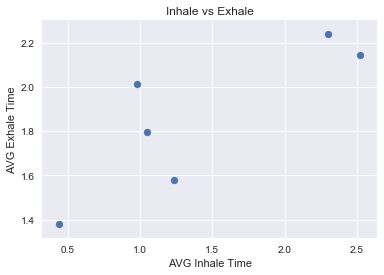

We can see that the is a positive correlation between two.(As Expected)



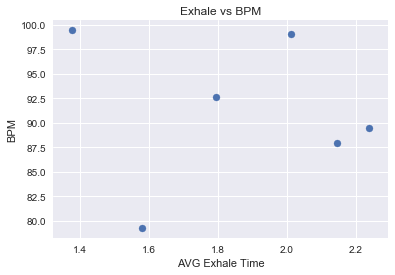

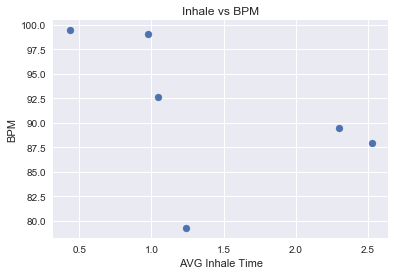

From the graphs it is very evident that as the breathing time decreases, the heart rate increases.
Biologically we see this happening in our every day lives.
If we are working ourselves our heartrate increases and also the breathing time decreases.
Also we see that animals that are physically small have a high BPM value and their breathing is also fast!!



Hence we see that results obtained are in consistance with the real life scenario!
To clearly get an idea of the graphs:
I replot by excluding the faulty reading.


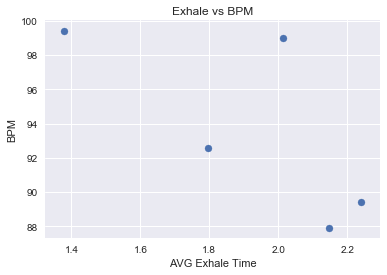

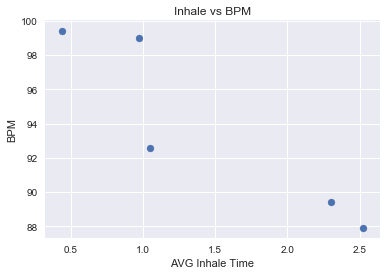

In [73]:
#Understanding Inhale/ Exhale Time relation with BPM

h1 = np.mean(cleaned[cleaned['period']=='morning'])
h2 = np.mean(cleaned[cleaned['period']=='after breakfast'])
h3 = np.mean(cleaned[cleaned['period']=='before lunch'])
h4 = np.mean(cleaned[cleaned['period']=='after lunch'])
h5 = np.mean(cleaned[cleaned['period']=='after jogging'])
h6 = np.mean(cleaned[cleaned['period']=='night'])

bpm = np.array([h1[0], h2[0], h3[0], h4[0], h5[0], h6[0]])
print(bpm)

#PLOTS

plt.scatter(inhaleavg, exhaleavg)
plt.xlabel("AVG Inhale Time")
plt.ylabel("AVG Exhale Time")
plt.title("Inhale vs Exhale")
plt.show()
print("We can see that the is a positive correlation between two.(As Expected)\n")

plt.scatter(exhaleavg, bpm)
plt.xlabel("AVG Exhale Time")
plt.ylabel("BPM")
plt.title("Exhale vs BPM")
plt.show()

plt.scatter(inhaleavg, bpm)
plt.xlabel("AVG Inhale Time")
plt.ylabel("BPM")
plt.title("Inhale vs BPM")
plt.show()


print("From the graphs it is very evident that as the breathing time decreases, the heart rate increases.")
print("Biologically we see this happening in our every day lives.")
print("If we are working ourselves our heartrate increases and also the breathing time decreases.")
print("Also we see that animals that are physically small have a high BPM value and their breathing is also fast!!")

print("\n\n")
print("Hence we see that results obtained are in consistance with the real life scenario!")

print("To clearly get an idea of the graphs:\nI replot by excluding the faulty reading.")

bpm1 = [h1[0], h2[0], h3[0], h5[0], h6[0]]
exhale = [exhaleavg[0],exhaleavg[1],exhaleavg[2],exhaleavg[4],exhaleavg[5]]
inhale = [inhaleavg[0],inhaleavg[1],inhaleavg[2],inhaleavg[4],inhaleavg[5]]

plt.scatter(exhale, bpm1)
plt.xlabel("AVG Exhale Time")
plt.ylabel("BPM")
plt.title("Exhale vs BPM")
plt.show()

plt.scatter(inhale, bpm1)
plt.xlabel("AVG Inhale Time")
plt.ylabel("BPM")
plt.title("Inhale vs BPM")
plt.show()